Let's consider a binary system of two compact objects, such as neutron stars or black holes. We assume them to be point-like and their orbit to be circular. The objects have the masses $m_1$ and $m_2$.

A certain combination of the objects' masses is the so-called chirp mass.

$$ M_{chirp} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}} $$

The chirp mass is related to the frequency of the gravitational wave $f_{GW}$ that is emitted by the binary system. Over time, the emission of gravitational waves leads to the loss of energy, which results in the objects to inspiral and finally merge. At the same time, the frequency of the gravitational waves increases.

Its time derivative can be written as

$$ \frac{d f_{GW}}{dt} = \frac{96}{5} \pi^{8/3} \left( \frac{G M_{chirp}}{c^3} \right)^{5/3} f_{GW}^{11/3}, $$

where $G$ is the gravitational constant and $c$ the speed of light.

#### Task
Use the given data (the arrays for the time $t$ and amplitude $h_{plus}$ of the GW) from a gravitational wave signal. Extract the frequency at at least thousand points and compute its derivative numerically. Derive the chirp mass using the frequency and its derivative.

#### Instructions
1. First, we have to find the maxima of the array 'h_plus' and store them in a new array 'max_h' (the frequency can then be derived as the difference between two maxima). Keep in mind that it might be useful to also extract the time at the maximum from the array 't' and store it in another array 'time_at_max'.
2. Create an array for the frequencies 'freq' and append the frequency values as the differences between two maxima (two consecutive data points in the array created before). At the same time, create a new array 'time' for the time and append the mean value of the two points in time that belong to the maxima.
3. Calculate the numerical derivative of the frequency using $np.gradient(freq,time)$ and store the result in a new array 'deriv_freq'.
4. Define a function that calculates the chirp mass from the input parameters 'frequency' and 'frequency derivative'.
5. Loop over all pairs of (frequency, frequency derivative) to calculate the respective values for the chirp mass. Store the results in an array.
6. Calculate the final result for the chirp mass as the mean value of the before created array.

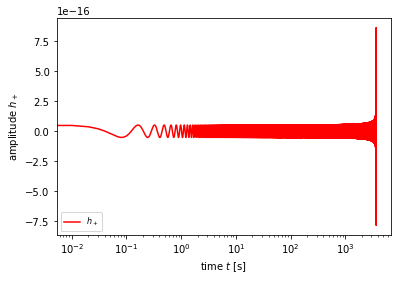

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# This code gives us the data of the GW signal!
# define necessary constants
G = 1.3274648756e11  # km^3/s^2 /M_sun
c = 2.99792458e5     # km/s

# initialize parameters
m_1 = 1.4            # mass of first merging object (in M_sun)
m_2 = 1.4            # mass of second merging object (in M_sun)
d   = 3.086e16       # distance to merger, corresponds to 1 kpc (in km)
R_0 = 1e3            # initial orbital radius (in km)
f_min = 100          # minimum observable frequency of LIGO (in Hz)

# chirp mass of the system
m_chirp = ((m_1*m_2)**(3.0/5.0))/((m_1 + m_2)**(1.0/5.0))

# time until coalescense (idealized of course)
t_coal = (5.0/256.0)*(c**5.0)*((R_0**4.0)/((G**3.0)*m_1*m_2*(m_1 + m_2)))

# create array with time steps
t = np.arange(0.0, t_coal, step = 1.0/f_min)

# calculate phase of GW
phase = - 2.0*(((5.0*G*m_chirp)/(c**3.0))**(-5.0/8.0))*((t_coal - t)**(5.0/8.0))
phase -= phase[0]

# calculate amplitude of GW
h_plus = (4.0/d)*(((G*m_chirp)/(c**2.0))**(5.0/4.0))*((5.0/(t_coal - t))**(1.0/4.0))*np.cos(phase)

# plot the GW signal
plt.plot(t, h_plus, color = 'red', label = r'$h_+$')
plt.xlabel(r'time $t$ [s]')
plt.ylabel(r'amplitude $h_+$')
plt.xscale('log')
plt.legend(loc = 'lower left', fontsize = 8)
plt.show()